# SHO Fitter on the noisy data

In [1]:
import sys

sys.path.append("../../")
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from m3_learning.be.dataset import BE_Dataset
from m3_learning.viz.printing import printer
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model


# from m3_learning.be.dataset import BE_Dataset
printing = printer(basepath = './Figures/')

2023-05-14 20:31:02.618400: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 20:31:02.735675: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-14 20:31:03.177356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/cv2/../../lib64:
2023-05-14 20:31:03.177407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

The Solution to the problem is to place the data into the state do the fits and then take the data out of the state. This is a bit of a pain but it works.

In [3]:
# import sys
# sys.path.append('../../')
# sys.path.append('/home/ferroelectric/m3_learning/m3_learning/src')


In [4]:
# import matplotlib.pyplot as plt
# import numpy as np
# import h5py
# import time
# import pandas as pd
# import os
# import shutil
# import gc
# import gdown

# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader

# from scipy.signal import resample
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split 

# from src.m3_learning.optimizers.AdaHessian import AdaHessian
# from src.m3_learning.nn.SHO_fitter.SHO import SHO_fit_func_torch
# from src.m3_learning.be.processing import convert_amp_phase, SHO_Fitter, SHO_fit_to_array
# from src.m3_learning.nn.random import random_seed
# from src.m3_learning.util.preprocessing import global_scaler
# from src.m3_learning.viz.layout import layout_fig

# from src.m3_learning.be.util import print_be_tree

# from src.m3_learning.viz.printing import printer
# from src.m3_learning.viz.layout import combine_lines, labelfigs


# printing = printer(basepath='./figures/')

In [5]:
# gdown.download(
#     "https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2",
#     path + "data_file_google.h5",
#     quiet=False,
#     resume=True,
# )

## Loads data

In [6]:
# # Sets path to file
# path = r"./"

# # Opens the data file
# h5_f = h5py.File(path + "data_file.h5", "r+")

# # number of pixels in the image
# num_pix = h5_f["Measurement_000"].attrs["num_pix"]

# num_pix_1d = int(np.sqrt(num_pix))

# # Frequency Vector in Hz
# frequency_bin = h5_f["Measurement_000"]["Channel_000"]["Bin_Frequencies"][:]

# # extracting spectroscopic values
# spectroscopic_values = h5_f['Measurement_000']['Channel_000']['Spectroscopic_Values']

# # number of DC voltage steps
# voltage_steps = h5_f["Measurement_000"].attrs["num_udvs_steps"]

# # Resampled frequency vector
# wvec_freq = resample(frequency_bin, 80)

# # get raw data (real and imaginary combined)
# raw_data = h5_f["Measurement_000"]["Channel_000"]["Raw_Data"]
# raw_data_resampled = resample(np.array(h5_f["Measurement_000"]["Channel_000"]["Raw_Data"]).reshape(-1, 165), 80, axis=1)

# # conversion of raw data (both resampled and full)
# amp, phase = convert_amp_phase(raw_data)
# amp_resample, phase_resample = convert_amp_phase(raw_data_resampled)

# scaled_data = h5_f["Measurement_000"]["Channel_000"]['complex']['scaled_data'][:]
# real_resample = h5_f["Measurement_000"]["Channel_000"]['complex']['real_resample'][:]
# imag_resample = h5_f["Measurement_000"]["Channel_000"]['complex']['imag_resample'][:]

# # scale the real component of input data
# scaler_real = global_scaler()
# scaled_data_real = scaler_real.fit_transform(real_resample).reshape(-1, 80)

# # scale the imaginary component of input data
# scaler_imag = global_scaler()
# scaled_data_imag = scaler_imag.fit_transform(imag_resample).reshape(-1, 80)

In [8]:
# Specify the filename and the path to save the file
filename = "data_raw_original.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=80, SHO_fit_func_NN=SHO_fit_func_nn)

# print the contents of the file
dataset.print_be_tree()

KeyboardInterrupt: 

In [26]:

h5_main = usid.hdf_utils.find_dataset(h5_file, "Raw_Data")[0]

<HDF5 dataset "Raw_Data": shape (3600, 63360), type "<c8">

In [41]:

h5_norm = usid.hdf_utils.write_main_dataset(h5_f[f"/Measurement_000/Channel_000/"],  # parent group
                                            data,  # data to be written
                                            'Normalized_Data',  # Name of the main dataset
                                            'Current',  # quantity
                                            'nA',  # units
                                            None,  # position dimensions
                                            None,  # spectroscopic dimensions
                                            h5_pos_inds=h5_main.h5_pos_inds,
                                            h5_pos_vals=h5_main.h5_pos_vals,
                                            h5_spec_inds=h5_main.h5_spec_inds,
                                            h5_spec_vals=h5_main.h5_spec_vals,
                                            compression='gzip')
print(h5_norm)

<HDF5 dataset "Normalized_Data": shape (3600, 63360), type "<f8">
located at: 
	/Measurement_000/Channel_000/Normalized_Data 
Data contains: 
	Current (nA) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Frequency - size: 165 
	DC_Offset - size: 96 
	Field - size: 2 
	Cycle - size: 2
Data Type:
	float64


In [100]:
data = generate_noisy_data(dataset, noise_multipliers=3)

In [12]:
from m3_learning.util.h5_util import make_dataset, make_group
import pyUSID as usid
with h5py.File(dataset.file, "a") as h5_file:
    h5_main = usid.hdf_utils.find_dataset(h5_file, "Raw_Data")[0]

In [ ]:
h5_main = usid.hdf_utils.find_dataset(h5_f, "Normalized_Data")[0]

In [30]:
h5_main = usid.hdf_utils.find_dataset(h5_f, "Normalized_Data")[0]
h5_main

<HDF5 dataset "Normalized_Data": shape (3600, 63360), type "<f8">
located at: 
	/Noisy_Data/Normalized_Data 
Data contains: 
	Current (nA) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Frequency - size: 165 
	DC_Offset - size: 96 
	Field - size: 2 
	Cycle - size: 2
Data Type:
	float64

In [42]:
dataset.SHO_Fitter(dataset = "Normalized_Data", h5_sho_targ_grp="test")

Working on:
./../../../Data/2023_rapid_fitting/data_raw copy.h5
['Y', 'X'] [60, 60]


SHO Fits will be written to:
./../../../Data/2023_rapid_fitting/data_raw copy.h5


Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume



KeyboardInterrupt: 

In [21]:
h5_main = usid.USIDataset(h5_main)

TypeError: Supply a h5py.Dataset object that is a USID main dataset

In [11]:
import h5py
h5_f = h5py.File(dataset.file, "r+")


In [136]:
for key, val in sidpy.hdf_utils.get_attributes(h5_f["/Noisy_Data/Noise_1/Raw_Data"]).items():
    print('{} : {}'.format(key, val))

Bin_FFT : <HDF5 object reference (null)>
Bin_Frequencies : <HDF5 object reference (null)>
Bin_Indices : <HDF5 object reference (null)>
Bin_Step : <HDF5 object reference (null)>
Bin_Wfm_Type : <HDF5 object reference (null)>
Excitation_Waveform : <HDF5 object reference (null)>
Noise_Floor : <HDF5 object reference (null)>
Position_Indices : <HDF5 object reference (null)>
Position_Values : <HDF5 object reference (null)>
Raw_Data : <HDF5 object reference (null)>
Spectroscopic_Indices : <HDF5 object reference (null)>
Spectroscopic_Values : <HDF5 object reference (null)>
UDVS : <HDF5 object reference (null)>
UDVS_Indices : <HDF5 object reference (null)>
in_field_Plot_Group : <HDF5 region reference (null>
out_of_field_Plot_Group : <HDF5 region reference (null>
quantity : Piezoresponse
units : V


In [39]:
import sidpy

print(sidpy.hdf_utils.get_attributes(h5_main.parent.parent))

{'Pycroscopy version': '0.60.4', 'current_position_x': 59, 'current_position_y': 59, 'data_type': 'BEPSData', 'experiment_date': '18-Sep-2015 18:32:14', 'grid_size_x': 60, 'grid_size_y': 60, 'translator': 'NDF'}


In [137]:
h5_f["/Noisy_Data/Noise_1/Raw_Data"]

<HDF5 dataset "Raw_Data": shape (3600, 63360), type "<c8">

In [131]:
usid.hdf_utils.write_main_dataset(h5_f['Measurement_000'],
                                  (self.num_pix, self.voltage_steps),
                                  "Raw_Data_Noise_3",
                                  "Piezoresponse",
                                  "V",
                                  (60,60),
                                  (2,165),
                                  dtype = gzip,
                                  )

NameError: name 'gzip' is not defined

In [99]:
usid.hdf_utils.write_main_dataset??

Signature:
usid.hdf_utils.write_main_dataset(
    h5_parent_group,
    main_data,
    main_data_name,
    quantity,
    units,
    pos_dims,
    spec_dims,
    main_dset_attrs=None,
    h5_pos_inds=None,
    h5_pos_vals=None,
    h5_spec_inds=None,
    h5_spec_vals=None,
    aux_spec_prefix='Spectroscopic_',
    aux_pos_prefix='Position_',
    verbose=False,
    slow_to_fast=False,
    **kwargs,
)
Source:   
def write_main_dataset(h5_parent_group, main_data, main_data_name, quantity, units, pos_dims, spec_dims,
                       main_dset_attrs=None, h5_pos_inds=None, h5_pos_vals=None, h5_spec_inds=None, h5_spec_vals=None,
                       aux_spec_prefix='Spectroscopic_', aux_pos_prefix='Position_', verbose=False,
                       slow_to_fast=False, **kwargs):
    """
    Writes the provided data as a 'Main' dataset with all appropriate linking.
    By default, the instructions for generating the ancillary datasets should be specified using the pos_dims and
    spec_

In [116]:
usid.io.hdf_utils.find_dataset(h5_f,"Noise_1")[0]

<HDF5 dataset "Noise_1": shape (3600, 63360), type "<c16">

In [112]:
h5_f[f"Noisy_Data"]["Noise_1"]["Raw_Data"]

<HDF5 dataset "Raw_Data": shape (3600, 63360), type "<c8">

In [135]:
# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data_Reshaped
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
    ├ raw_data_resampled
  ├ Noise_1
  ├ Noisy_Data_1
    ------------
├ Noisy_Data
  ----------
  ├ Noise_1
    -------
    ├ Bin_FFT
    ├ Bin_Frequencies
    

In [ ]:
# # create a list for parameters
# fit_results_list = SHO_fit_to_array(h5_f["Measurement_000"]["Channel_000"]["Raw_Data-SHO_Fit_000"]["Fit"])

# # flatten parameters list into numpy array
# fit_results_list = np.array(fit_results_list).reshape(num_pix, voltage_steps, 5)

# # exclude the R2 parameter
# params = fit_results_list.reshape(-1, 5)[:, 0:4]

# # scale the parameters (now takes only 4 parameters, excluding the R2)
# params_scaler = StandardScaler()
# scaled_params = params_scaler.fit_transform(fit_results_list.reshape(-1, 5)[:, 0:4])

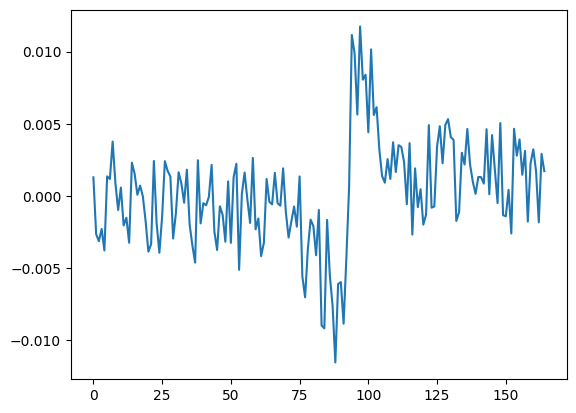

In [28]:
import h5py
import pyUSID as usid
import sidpy
import matplotlib.pyplot as plt

with h5py.File(dataset.file, "a") as h5_f:
    # h5_main = usid.hdf_utils.find_dataset(h5_f, "Raw_Data")[0]
    plt.plot(h5_f["/Noisy_Data/Noise_1/Raw_Data"][:].reshape(3600,384,165)[350,100])

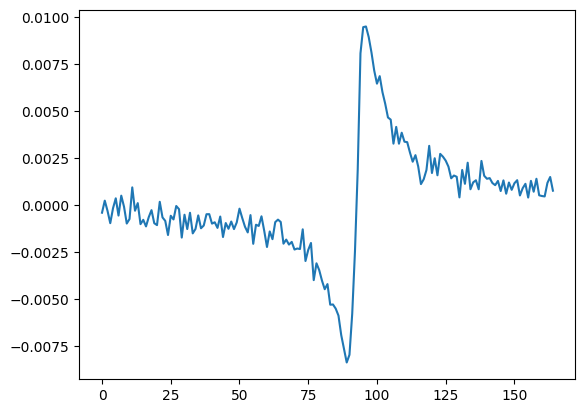

In [29]:
import h5py
import pyUSID as usid
import sidpy
import matplotlib.pyplot as plt

with h5py.File(dataset.file, "a") as h5_f:
    # h5_main = usid.hdf_utils.find_dataset(h5_f, "Raw_Data")[0]
    plt.plot(h5_f["/Measurement_000/Channel_000/Raw_Data"][:].reshape(3600,384,165)[350,100])

In [52]:

with h5py.File(dataset.file, "a") as h5_f:
    #sidpy.hdf_utils.link_h5_objects_as_attrs(h5_f["/Measurement_000/Channel_000/Raw_Data"], h5_f["/Noisy_Data/Noise_1/Raw_Data"])
    # sidpy.hdf.hdf_utils.copy_attributes()
    h5_f["/Measurement_000/Channel_000/Raw_Data"][0].h5_pos_inds

AttributeError: 'numpy.ndarray' object has no attribute 'h5_pos_inds'

In [48]:
with h5py.File(dataset.file, "a") as h5_f:
    for key, val in sidpy.hdf_utils.get_attributes(h5_f["/Noisy_Data/Noise_1/Raw_Data"]).items():
        print('\t%s : %s' % (key, val))

	Bin_FFT : <HDF5 object reference (null)>
	Bin_Frequencies : <HDF5 object reference (null)>
	Bin_Indices : <HDF5 object reference (null)>
	Bin_Step : <HDF5 object reference (null)>
	Bin_Wfm_Type : <HDF5 object reference (null)>
	Excitation_Waveform : <HDF5 object reference (null)>
	Noise_Floor : <HDF5 object reference (null)>
	Position_Indices : <HDF5 object reference (null)>
	Position_Values : <HDF5 object reference (null)>
	Spectroscopic_Indices : <HDF5 object reference (null)>
	Spectroscopic_Values : <HDF5 object reference (null)>
	UDVS : <HDF5 object reference (null)>
	UDVS_Indices : <HDF5 object reference (null)>
	in_field_Plot_Group : <HDF5 region reference (null>
	out_of_field_Plot_Group : <HDF5 region reference (null>
	quantity : Piezoresponse
	units : V


In [59]:
with h5py.File(dataset.file, "a") as h5_file:
    print(type(usid.hdf_utils.find_dataset(h5_file["/Noisy_Data/Noise_1"], "Raw_Data")[0]))
    print(type(usid.hdf_utils.find_dataset(h5_file, "Raw_Data")[0]))

<class 'h5py._hl.dataset.Dataset'>
<class 'pyUSID.io.usi_data.USIDataset'>


In [152]:
h5_main_old = usid.hdf_utils.find_dataset(h5_f, "Raw_Data")[0]
h5_main_new = usid.hdf_utils.find_dataset(h5_f["/Noisy_Data/Noise_1"], "Raw_Data")[0]

In [153]:
h5_main_old.h5_pos_inds

<HDF5 dataset "Position_Indices": shape (3600, 2), type "<u4">

In [163]:


h5_main_new.h5_pos_inds =h5_main_old.h5_pos_inds
h5_main_new.pos_dim_sizes =h5_main_old.pos_dim_sizes
h5_main_new.pos_dim_labels =h5_main_old.pos_dim_labels

usid.io.hdf_utils.simple.copy_main_attributes(h5_f["/Measurement_000/Channel_000/Raw_Data"],h5_f[f"Noisy_Data"]["Noise_1"]["Raw_Data"])

In [165]:
h5_main_new.parent.parent.parent

<HDF5 group "/" (3 members)>

In [167]:
dataset.SHO_Fitter(max_mem=1024*64, h5_main = h5_main_new, h5_sho_targ_grp = "original_data_1STD_SHO_Fit_000")

Working on:
./../../../Data/2023_rapid_fitting/data_raw copy.h5
['Y', 'X'] [60, 60]


SHO Fits will be written to:
./../../../Data/2023_rapid_fitting/data_raw copy.h5




ValueError: Provided dataset is not a "Main" dataset with necessary ancillary datasets

In [ ]:
# all computations were pre-computed on A100 40GB NHI GPU
# set to False if you want to recompute
use_pre_computed_vars = False
use_pre_trained_models = False

In [140]:
print_be_tree('./data_file_noise_7.0.h5')

NameError: name 'print_be_tree' is not defined

### Copies initial dataset for the later use

In [ ]:
if not use_pre_computed_vars:
  # close the current file to perform a copy
  h5_f.close()
  for nl in noise_levels:
    shutil.copy('data_file_raw.h5', f'data_file_noise_{nl}.h5')
    time.sleep(3)

In [ ]:
for noise_level in noise_levels:
  
  with h5py.File(f'data_file_noise_{noise_level}.h5', 'r+') as h5_f_noise:
    data_pointer = h5_f_noise['Measurement_000']['Channel_000']['Raw_Data']
    raw_data_noise = np.array(h5_f_noise['Measurement_000']['Channel_000']['Raw_Data'])
    raw_data_noise = raw_data_noise + noise * float(noise_level) 
    data_pointer[...] = raw_data_noise
    del h5_f_noise['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']

## Builds the PyTorch model

In [ ]:
class SHO_Model(nn.Module):
    def __init__(self):
        super().__init__()

        # Input block of 1d convolution
        self.hidden_x1 = nn.Sequential(
            nn.Conv1d(in_channels=2, out_channels=8, kernel_size=7),
            nn.SELU(),
            nn.Conv1d(in_channels=8, out_channels=6, kernel_size=7),
            nn.SELU(),
            nn.Conv1d(in_channels=6, out_channels=4, kernel_size=5),
            nn.SELU(),
        )

        # fully connected block
        self.hidden_xfc = nn.Sequential(
            nn.Linear(256, 20),
            nn.SELU(),
            nn.Linear(20, 20),
            nn.SELU(),
        )

        # 2nd block of 1d-conv layers
        self.hidden_x2 = nn.Sequential(
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=2, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
            nn.Conv1d(in_channels=4, out_channels=2, kernel_size=3),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
            nn.Conv1d(in_channels=2, out_channels=2, kernel_size=3),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
        )

        # Flatten layer
        self.flatten_layer = nn.Flatten()

        # Final embedding block - Output 4 values - linear
        self.hidden_embedding = nn.Sequential(
            nn.Linear(26, 16),
            nn.SELU(),
            nn.Linear(16, 8),
            nn.SELU(),
            nn.Linear(8, 4),
        )

    def forward(self, x, n=-1):
        x = torch.swapaxes(x, 1, 2)  # output shape - samples, (real, imag), frequency
        x = self.hidden_x1(x)
        xfc = torch.reshape(x, (n, 256))  # batch size, features
        xfc = self.hidden_xfc(xfc)
        x = torch.reshape(x, (n, 2, 128))  # batch size, (real, imag), timesteps
        x = self.hidden_x2(x)
        cnn_flat = self.flatten_layer(x)
        encoded = torch.cat((cnn_flat, xfc), 1)  # merge dense and 1d conv.
        embedding = self.hidden_embedding(encoded)  # output is 4 parameters

        # corrects the scaling of the parameters
        unscaled_param = (
            embedding * torch.tensor(params_scaler.var_[0:4] ** 0.5).cuda()
            + torch.tensor(params_scaler.mean_[0:4]).cuda()
        )

        # passes to the pytorch fitting function
        fits = SHO_fit_func_torch(unscaled_param, wvec_freq, device="cuda")

        # extract and return real and imaginary
        real = torch.real(fits)
        real_scaled = (real - torch.tensor(scaler_real.mean).cuda()) / torch.tensor(
            scaler_real.std
        ).cuda()
        imag = torch.imag(fits)
        imag_scaled = (imag - torch.tensor(scaler_imag.mean).cuda()) / torch.tensor(
            scaler_imag.std
        ).cuda()
        out = torch.stack((real_scaled, imag_scaled), 2)
        return out

## Trains NN

### Train/Test Split

In [ ]:
data_train, data_test, params_train, params_test = train_test_split(
    scaled_data, scaled_params, test_size=0.7, random_state=42
)

params_test_unscaled = params_scaler.inverse_transform(params_test)

### Training

In [ ]:
if not use_pre_trained_models:
  max_num_of_updates = scaled_data.shape[0] // 16 * 10
  output_tensor_dict = {}
  seed = 0
  noise_reshaped = resample(noise.reshape(-1, 165), 80, axis=1)
  noise_2d = np.stack((np.real(noise_reshaped), np.imag(noise_reshaped)), axis=2)
  noise_train, noise_test = train_test_split(noise_2d, test_size=0.7, random_state=42)

In [ ]:
if not use_pre_trained_models:
  for noise_factor in noise_levels:
      noise_factor = float(noise_factor)
      random_seed(seed=42)
      torch.cuda.empty_cache()
      model = SHO_Model().cuda()

      loss_func = torch.nn.MSELoss()
      batch_size = 128
      data_noise = scaled_data + noise_2d * noise_factor
      data_train_noise = data_train + noise_train * noise_factor
      data_test_noise = data_test + noise_test * noise_factor

      optimizer = torch.optim.Adam(model.parameters())
      train_dataloader = DataLoader(data_train_noise, batch_size=batch_size)
      epochs = max_num_of_updates * batch_size // scaled_data.shape[0] // 16
      print(f"Training with batch size = {batch_size}, noise factor = {noise_factor}")
      start_time_training = time.time()
      for epoch in range(epochs):
          start_time = time.time()
          train_loss = 0.
          total_num = 0

          model.train()

          for train_batch in train_dataloader:
              pred = model(train_batch.double().cuda())
              optimizer.zero_grad()
              loss = loss_func(train_batch.double().cuda(), pred)
              loss.backward(create_graph=True)
              train_loss += loss.item() * pred.shape[0]
              total_num += pred.shape[0]
              optimizer.step()

          train_loss /= total_num
          torch.save(model.state_dict(), f'./Trained Models/SHO Fitter/model_noise_{noise_factor}_bs128.pt')

          print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, train_loss))
          print("--- %s seconds ---" % (time.time() - start_time))

      print(f"Training with batch size={batch_size} took {time.time() - start_time_training} seconds\n")

      del train_dataloader
      del data_noise
      del data_train_noise
      del data_test_noise
      del model
      gc.collect()
      torch.cuda.empty_cache()

### Computes fits

In [ ]:
for noise_level in noise_levels:
    SHO_Fitter(f'data_file_noise_{noise_level}.h5', force=True)
    print(f'Computation for noise level={noise_level} is done!')

### Uses Pre-computed Noisy SHO Fits

In [ ]:
# TODO: download from Zenodo

In [ ]:
if use_pre_computed_vars:
  !unzip noisy_sho_fits.zip